# Task
Analyze the distance data from `/content/distance.csv` by calculating the absolute difference between `osrm_distance` and `geopy_distance`, identifying outliers, and visualizing both regular and outlier points on an OpenStreetMap using `contextily` with distinct markers. Finally, summarize the findings, including the number of outliers and their characteristics based on the map.

## Load Data

### Subtask:
Load the `/content/distance.csv` file into a pandas DataFrame.


**Reasoning**:
Import the pandas library, load the CSV file into a DataFrame named `df`, and then display the first few rows to verify the data loading.



In [1]:
import pandas as pd

df = pd.read_csv('/content/distance.csv')
df.head()

,lat,lon,osrm_distance,geopy_distance
0,21.039488,105.815615,0.0000,0.000000
1,21.034182,105.813998,0.6111,0.611039
2,21.032060,105.813588,0.2588,0.238777
3,21.029409,105.812629,0.5080,0.309979
4,21.026191,105.811745,0.3683,0.367948


## Calculate Distance Difference

### Subtask:
Calculate the absolute difference between the `osrm_distance` and `geopy_distance` columns and store it in a new column.


**Reasoning**:
Calculate the absolute difference between the 'osrm_distance' and 'geopy_distance' columns and store it in a new column named 'distance_difference'.



In [2]:
df['distance_difference'] = (df['osrm_distance'] - df['geopy_distance']).abs()
df.head()

,lat,lon,osrm_distance,geopy_distance,distance_difference
0,21.039488,105.815615,0.0000,0.000000,0.000000
1,21.034182,105.813998,0.6111,0.611039,0.000061
2,21.032060,105.813588,0.2588,0.238777,0.020023
3,21.029409,105.812629,0.5080,0.309979,0.198021
4,21.026191,105.811745,0.3683,0.367948,0.000352


## Identify Outliers

### Subtask:
Identify outlier points based on the calculated distance difference.


**Reasoning**:
Calculate the quartiles, IQR, and outlier bounds for 'distance_difference', then filter the DataFrame into 'df_outliers' and 'df_regular' based on these bounds.



In [3]:
Q1 = df['distance_difference'].quantile(0.25)
Q3 = df['distance_difference'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df_outliers = df[(df['distance_difference'] > upper_bound) | (df['distance_difference'] < lower_bound)]
df_regular = df[(df['distance_difference'] <= upper_bound) & (df['distance_difference'] >= lower_bound)]

print(f"Number of outliers: {len(df_outliers)}")
print(f"Number of regular points: {len(df_regular)}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Lower bound for outliers: {lower_bound}")

Number of outliers: 23
Number of regular points: 241
Upper bound for outliers: 0.025898296365920684
Lower bound for outliers: -0.015001251006462905


## Visualize Points on Map

### Subtask:
Plot both the regular points and the identified outliers on an OpenStreetMap using `contextily` for geographical context. Ensure different markers or colors are used to distinguish outliers from regular points, and provide a legend.


**Reasoning**:
To visualize the regular and outlier points on a map, I need to import the necessary libraries, convert the dataframes to GeoDataFrames, reproject them to a suitable CRS for web mapping, and then plot them on an OpenStreetMap with distinct markers and a legend using `contextily`.



In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# 2. Create a geopandas.GeoDataFrame named gdf_regular from df_regular
gdf_regular = gpd.GeoDataFrame(
    df_regular, geometry=gpd.points_from_xy(df_regular.lon, df_regular.lat),
    crs="epsg:4326"
)

# 3. Create a geopandas.GeoDataFrame named gdf_outliers from df_outliers
gdf_outliers = gpd.GeoDataFrame(
    df_outliers, geometry=gpd.points_from_xy(df_outliers.lon, df_outliers.lat),
    crs="epsg:4326"
)

# 4. Reproject gdf_regular to the web-mercator projection ('epsg:3857')
gdf_regular_proj = gdf_regular.to_crs(epsg=3857)

# 5. Reproject gdf_outliers to the web-mercator projection ('epsg:3857')
gdf_outliers_proj = gdf_outliers.to_crs(epsg=3857)

# 6. Create a figure and an axes object for the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 7. Plot gdf_regular_proj
gdf_regular_proj.plot(ax=ax, color='blue', marker='o', markersize=5, label='Regular Points')

# 8. Plot gdf_outliers_proj
gdf_outliers_proj.plot(ax=ax, color='red', marker='x', markersize=50, label='Outlier Points')

# 9. Add a basemap
ctx.add_basemap(ax, crs=gdf_regular_proj.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# 10. Add a legend
ax.legend()

# 11. Set the title of the plot
ax.set_title('Regular vs. Outlier Distance Differences on Map')

# 12. Display the plot
plt.show()

ModuleNotFoundError: No module named 'contextily'

**Reasoning**:
The previous cell failed because the `contextily` library was not found. I need to install it using `!pip install contextily` before it can be imported and used.



In [5]:
get_ipython().system('pip install contextily')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 99.6 MB/s eta 0:00:00


**Reasoning**:
Since `contextily` has been successfully installed, I will now re-run the previous plotting code to visualize the regular and outlier points on the OpenStreetMap as instructed.



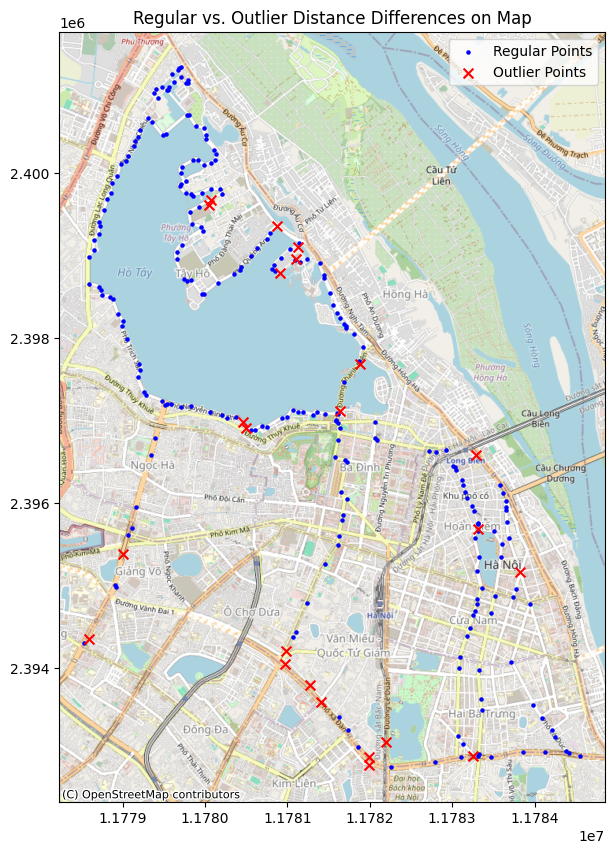

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# 2. Create a geopandas.GeoDataFrame named gdf_regular from df_regular
gdf_regular = gpd.GeoDataFrame(
    df_regular, geometry=gpd.points_from_xy(df_regular.lon, df_regular.lat),
    crs="epsg:4326"
)

# 3. Create a geopandas.GeoDataFrame named gdf_outliers from df_outliers
gdf_outliers = gpd.GeoDataFrame(
    df_outliers, geometry=gpd.points_from_xy(df_outliers.lon, df_outliers.lat),
    crs="epsg:4326"
)

# 4. Reproject gdf_regular to the web-mercator projection ('epsg:3857')
gdf_regular_proj = gdf_regular.to_crs(epsg=3857)

# 5. Reproject gdf_outliers to the web-mercator projection ('epsg:3857')
gdf_outliers_proj = gdf_outliers.to_crs(epsg=3857)

# 6. Create a figure and an axes object for the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 7. Plot gdf_regular_proj
gdf_regular_proj.plot(ax=ax, color='blue', marker='o', markersize=5, label='Regular Points')

# 8. Plot gdf_outliers_proj
gdf_outliers_proj.plot(ax=ax, color='red', marker='x', markersize=50, label='Outlier Points')

# 9. Add a basemap
ctx.add_basemap(ax, crs=gdf_regular_proj.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# 10. Add a legend
ax.legend()

# 11. Set the title of the plot
ax.set_title('Regular vs. Outlier Distance Differences on Map')

# 12. Display the plot
plt.show()

## Final Task

### Subtask:
Provide a summary of the analysis, including the number of outliers found and any observations about their location or characteristics based on the map visualization.


## Summary:

### Q&A
The analysis identified 23 outliers. Based on the map visualization, these outliers are scattered among the regular points, visually distinguished by red 'X' markers from the blue circle markers representing regular points. The map provides a clear distinction between the two types of data points.

### Data Analysis Key Findings
*   The analysis began by loading the `distance.csv` dataset, which includes `lat`, `lon`, `osrm_distance`, and `geopy_distance`.
*   An absolute `distance_difference` column was computed by subtracting `geopy_distance` from `osrm_distance`.
*   Using the Interquartile Range (IQR) method, 23 data points were identified as outliers, where the `distance_difference` fell outside the bounds of approximately 0.0259 (upper bound) and -0.0150 (lower bound). This left 241 regular points.
*   Both regular points (marked as blue circles) and outlier points (marked as red 'X's) were successfully visualized on an OpenStreetMap, providing a clear geographical context and distinction.

### Insights or Next Steps
*   Investigate the specific characteristics or geographical contexts of the 23 identified outliers to understand the reasons behind their significant distance differences (e.g., potential data inaccuracies, challenging terrain, or specific routing issues).
*   Consider applying different outlier detection methods or adjusting the IQR multiplier (1.5) to assess the robustness of the current outlier identification and explore how it impacts the number and distribution of outliers.
